In [20]:
import numpy as np
import matplotlib.pyplot as plt
import aiapy

In [21]:
#response = aiapy.response(ssw_path='/home/ivan/Study/Astro/solar/rad_transfer/ssw/')

In [22]:
import matplotlib.pyplot as plt

import astropy.time
import astropy.units as u
from aiapy.response import Channel
c = Channel(131 * u.angstrom)
r = c.wavelength_response()
print(r)


[1.4659692e-09 1.4242997e-09 1.3838637e-09 ... 8.3955759e-13 8.3694710e-13
 8.3434729e-13] cm2 ct / ph


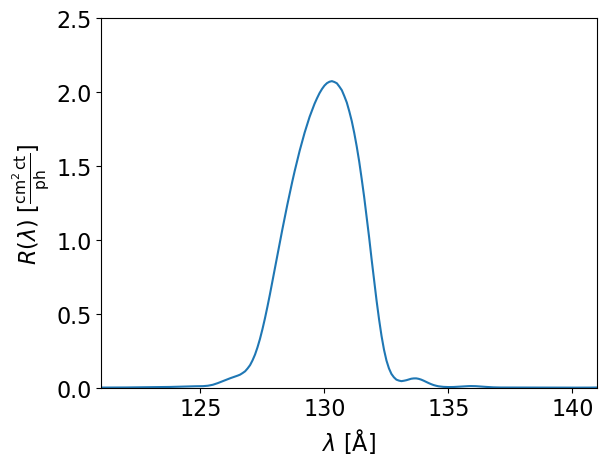

In [23]:
fig = plt.figure()
ax = fig.gca()
ax.plot(c.wavelength, r)
ax.set_xlim((c.channel + [-10, 10] * u.angstrom).value)
ax.set_ylim(0, 2.5)
ax.set_xlabel(r"$\lambda$ [Å]")
ax.set_ylabel(f'$R(\\lambda)$ [{r.unit.to_string("latex")}]')
#plt.show()
plt.savefig('131_response.png')

In [24]:
import scipy.io as io
# So can have single copy of demreg on system, and don't need copy in working directory
from sys import path as sys_path

import warnings
from scipy.io import readsav

# Load in the SSWIDL generated response functions
# Was produced by make_aiaresp_forpy.pro (can't escape sswidl that easily....)
trin=io.readsav('sdo_aia/aia_tresp_en.dat')
# Get rid of the b in the string name (byte vs utf stuff....)
for i in np.arange(len(trin['channels'])):
    trin['channels'][i]=trin['channels'][i].decode("utf-8")
print(trin['channels'])

['A94' 'A131' 'A171' 'A193' 'A211' 'A335']


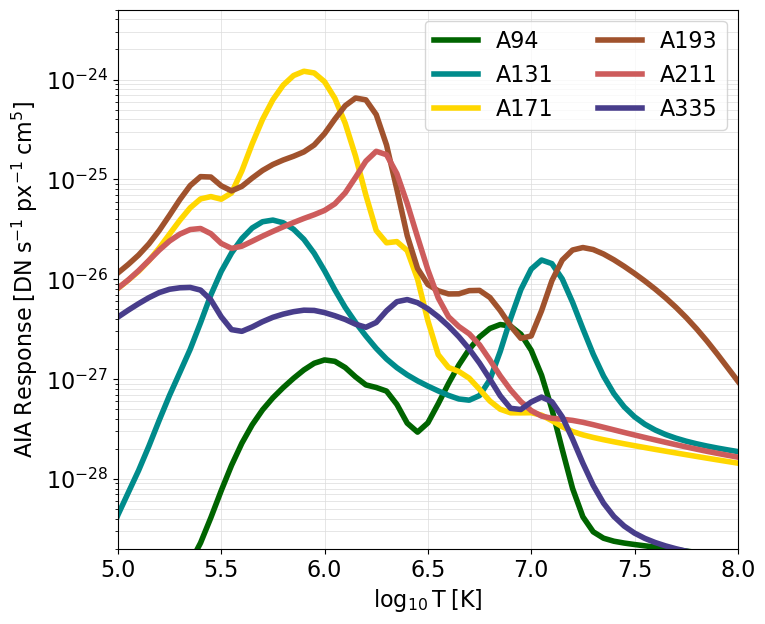

In [25]:
# Get the temperature response functions in the correct form for demreg
tresp_logt=np.array(trin['logt'])
nt=len(tresp_logt)
nf=len(trin['tr'][:])
trmatrix=np.zeros((nt,nf))
for i in range(0,nf):
    trmatrix[:,i]=trin['tr'][i]
#matplotlib.rcParams['font.size'] = 16

# Check the response look correct by plotting them
# Setup some AIA colours
clrs=['darkgreen','darkcyan','gold','sienna','indianred','darkslateblue']

# Do the plot
fig = plt.figure(figsize=(8, 7))
for i in np.arange(6):
    plt.semilogy(tresp_logt,trmatrix[:,i],label=trin['channels'][i],color=clrs[i],lw=4)
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim([2e-29,5e-24])
plt.xlim([5.0,8.0])
plt.legend(ncol=2,prop={'size': 16})
plt.rcParams.update({'font.size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()


In [26]:
print(trmatrix.shape)

(101, 6)
